In [16]:
from test import Test
from load_data import load_data
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def get_label(test):
    fair = ['Fair Stochastic Dominance Thompson Sampling',
            'Thompson Sampling - Fair Stochastic Dominance Thompson Sampling trade-off' \
            ' with Lambda = {}'.format(test.lam)]
    if test.name not in fair:
        return test.name
    else:
        return test.name + ' e1= {}'.format(test.e1) + ' e2= {}'.format(test.e2) + ' delta= {}'.format(test.delta)



[ 0.907  0.589  0.307  0.53   0.62   0.458  0.279  0.051  0.444  0.875]

####################
Stochastic Dominance Thompson Sampling
####################

Iterations:	100.0
T:		1000
e1:		2
e2:		0.0
delta:	0.0
Lambda: 1
Smooth Fair:	37966.51
Not Smooth Fair:	7033.49
=> Smooth Fair with Prob:	0.843700222222
Needed Probability: 1-delta	= 1.0
Cumulative Fairness Regret	97.53721189
Regret	269.62361


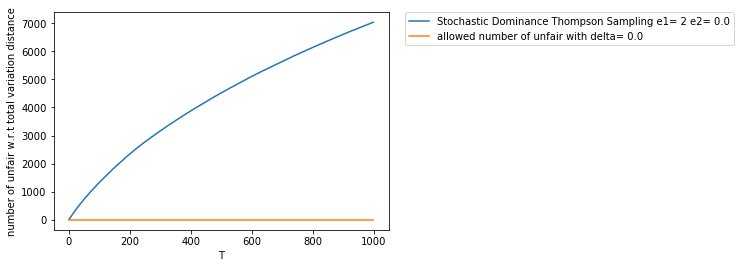

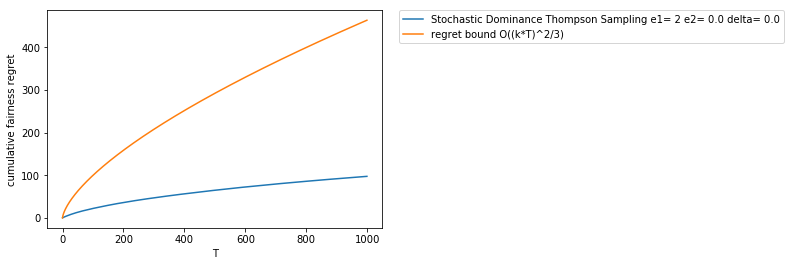

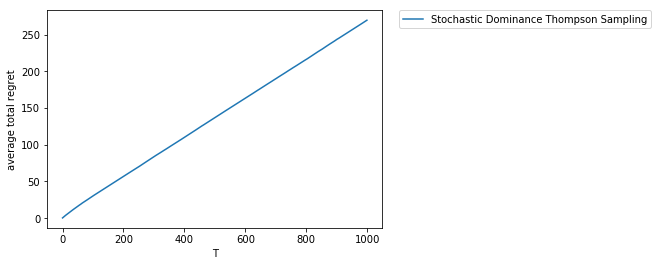

In [2]:
TEST_THOMPSON = 0
TEST_SD_TS = 1
TEST_FAIR_SD_TS = 0


N_ITERATIONS = 100.
DATA_SET = ['Bar Exam', 'Default on Credit'][0]

METHODS = TEST_THOMPSON*['Thompson Sampling'] + TEST_SD_TS*['Stochastic Dominance Thompson Sampling'] + \
          TEST_FAIR_SD_TS*['Fair Stochastic Dominance Thompson Sampling']

#bandits = load_data(DATA_SET)
p = [random.uniform(0, 1) for i in range(10)]
bandits = load_data('with given distribution', p)
print bandits.theta

T = 1000
e1 = [2]
e2 = [0.00]
delta = [0.0]
lam = [1]
test1 = Test(bandits, METHODS, N_ITERATIONS, T, e1, e2, delta, lam)
test1.print_result()
test1.plot_smooth_fairness()
test1.plot_fairness_regret()
test1.plot_average_total_regret()

In [3]:
TEST_THOMPSON = 0
TEST_SD_TS = 0
TEST_FAIR_SD_TS = 1


N_ITERATIONS = 10.
DATA_SET = ['Bar Exam', 'Default on Credit'][0]

METHODS = TEST_THOMPSON*['Thompson Sampling'] + TEST_SD_TS*['Stochastic Dominance Thompson Sampling'] + \
          TEST_FAIR_SD_TS*['Fair Stochastic Dominance Thompson Sampling']

#bandits = load_data(DATA_SET)
p = [random.uniform(0, 1) for i in range(10)]
bandits = load_data('with given distribution', p)
print bandits.theta

T = 1000
e1 = [2., 3., 4.]
e2 = [0.001, 1., 10.]
delta = [0.01, 1.0, 0.5]
lam = [1]
test1 = Test(bandits, METHODS, N_ITERATIONS, T, e1, e2, delta, lam)


[ 0.018  0.677  0.405  0.767  0.938  0.479  0.883  0.988  0.55   0.047]



####################
Fair Stochastic Dominance Thompson Sampling
####################

Iterations:	10.0
T:		1000
e1:		2.0
e2:		0.001
delta:	0.01
Lambda: 1
Smooth Fair:	45000.0
Not Smooth Fair:	0.0
=> Smooth Fair with Prob:	1.0
Needed Probability: 1-delta	= 0.99
Cumulative Fairness Regret	239.394993046
Regret	411.9763

####################
Fair Stochastic Dominance Thompson Sampling
####################

Iterations:	10.0
T:		1000
e1:		2.0
e2:		0.001
delta:	1.0
Lambda: 1
Smooth Fair:	45000.0
Not Smooth Fair:	0.0
=> Smooth Fair with Prob:	1.0
Needed Probability: 1-delta	= 0.0
Cumulative Fairness Regret	239.394993046
Regret	409.0746

####################
Fair Stochastic Dominance Thompson Sampling
####################

Iterations:	10.0
T:		1000
e1:		2.0
e2:		0.001
delta:	0.5
Lambda: 1
Smooth Fair:	45000.0
Not Smooth Fair:	0.0
=> Smooth Fair with Prob:	1.0
Needed Probability: 1-delta	= 0.5
Cumulative Fairness Regret	239.394993046
Regret	411.8751

####################
Fair Stochastic Domina

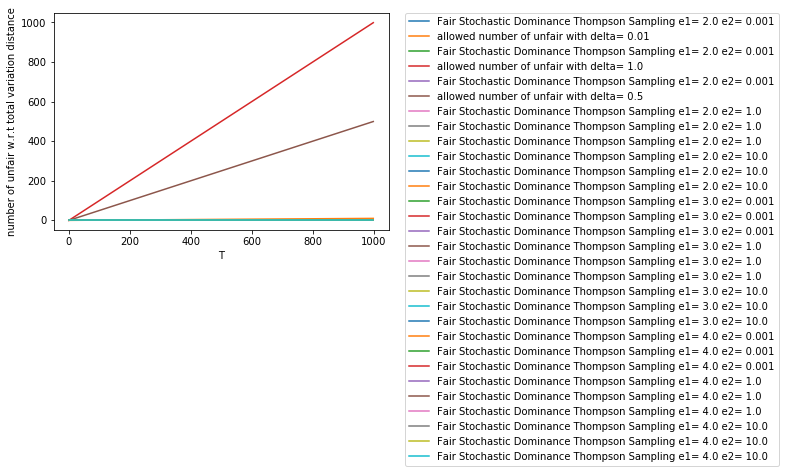

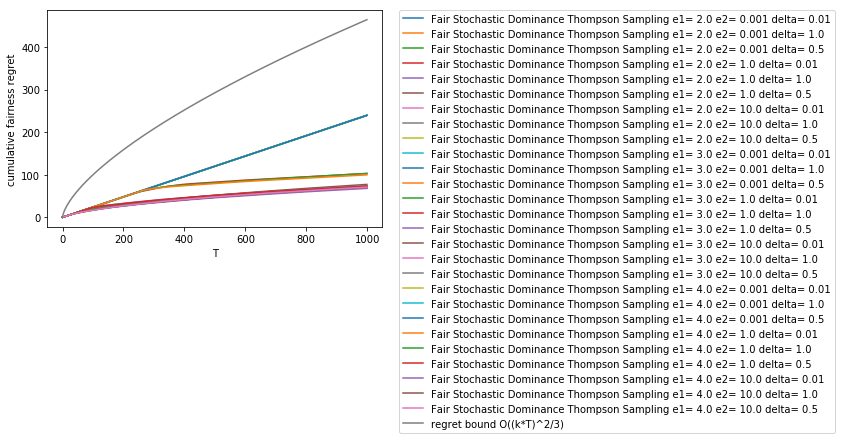

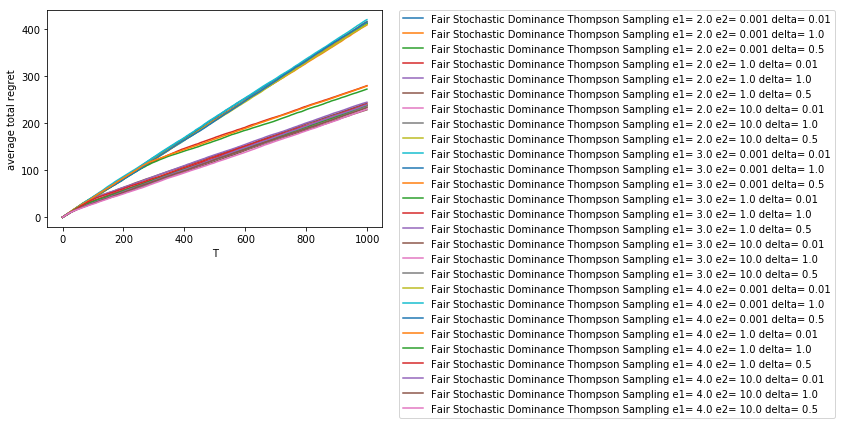

In [4]:
test1.print_result()
test1.plot_smooth_fairness()
test1.plot_fairness_regret()
test1.plot_average_total_regret()

In [14]:
TEST_THOMPSON = 0
TEST_SD_TS = 1
TEST_FAIR_SD_TS = 0


N_ITERATIONS = 100.
DATA_SET = ['Bar Exam', 'Default on Credit'][0]

METHODS = TEST_THOMPSON*['Thompson Sampling'] + TEST_SD_TS*['Stochastic Dominance Thompson Sampling'] + \
          TEST_FAIR_SD_TS*['Fair Stochastic Dominance Thompson Sampling']

#bandits = load_data(DATA_SET)
p = [random.uniform(0, 1) for i in range(10)]
bandits = load_data('with given distribution', p)
print bandits.theta
n_lam = 10
T = 1000
e1 = [2]
e2 = [0.0]
delta = [1.0]
lam = np.linspace(0,1,n_lam)
test1 = Test(bandits, METHODS, N_ITERATIONS, T, e1, e2, delta, lam)


def fairness_modification_regret(fairness_regret1, fairness_regret2):
    return fairness_regret1 - fairness_regret2


    

[ 0.048  0.48   0.764  0.987  0.537  0.764  0.943  0.689  0.129  0.804]


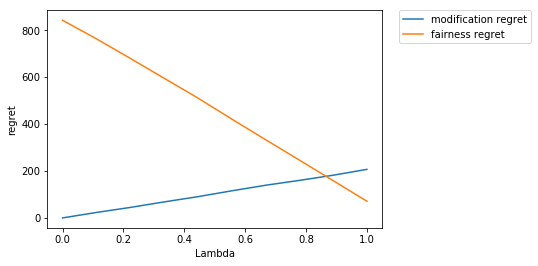

In [15]:


modification_regret = np.zeros(n_lam)
fairness_regret = np.zeros(n_lam)
for i in range(n_lam):
    modification_regret[i] = abs(test1.test_cases[i].regret[-1]-test1.test_cases[0].regret[-1])
    fairness_regret[i] = (test1.test_cases[i].average_fairness_regret[-1])

plt.plot(lam, modification_regret, label='modification regret')
plt.plot(lam, fairness_regret, label='fairness regret')
plt.xlabel('Lambda')
plt.ylabel('regret')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [13]:
TEST_THOMPSON = 0
TEST_SD_TS = 0
TEST_FAIR_SD_TS = 1


N_ITERATIONS = 100.
DATA_SET = ['Bar Exam', 'Default on Credit'][0]

METHODS = TEST_THOMPSON*['Thompson Sampling'] + TEST_SD_TS*['Stochastic Dominance Thompson Sampling'] + \
          TEST_FAIR_SD_TS*['Fair Stochastic Dominance Thompson Sampling']

#bandits = load_data(DATA_SET)
p = [random.uniform(0, 1) for i in range(10)]
bandits = load_data('with given distribution', p)
print bandits.theta
n_lam = 10
T = 1000
e1 = [2]
e2 = [0.001]
delta = [1.0]
lam = np.linspace(0,1,n_lam)
test1 = Test(bandits, METHODS, N_ITERATIONS, T, e1, e2, delta)


def fairness_modification_regret(fairness_regret1, fairness_regret2):
    return fairness_regret1 - fairness_regret2



[ 0.112  0.104  0.635  0.52   0.396  0.576  0.018  0.698  0.831  0.085]


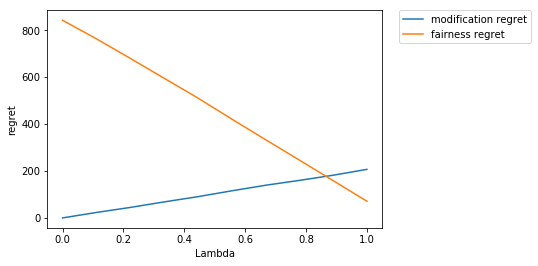

In [18]:


modification_regret = np.zeros(n_lam)
fairness_regret = np.zeros(n_lam)
for i in range(n_lam):
    modification_regret[i] = abs(test1.test_cases[i].regret[-1]-test1.test_cases[0].regret[-1])
    fairness_regret[i] = (test1.test_cases[i].average_fairness_regret[-1])

plt.plot(lam, modification_regret, label='modification regret')
plt.plot(lam, fairness_regret, label='fairness regret')
plt.xlabel('Lambda')
plt.ylabel('regret')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
